# Sentiment Analysis

Sentiment Analysis refers to the application of NLP, computational linguistics, and text analysis to identify and to classify the subjective opinions in given documents.

## What is the sentiment analysis?

+ To determine a writter's attitude towards a topic or the overall contextual polarity of given document.

+ To identify opinion words --> dominant indicators of feelings, especially adjectives, adverbs, and verbs. For instance: I love this game. It's amazing!

## Opinion words
Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types:
    - positive words: wonderful, elegant, etc.
    - negative words: poor, horrible, etc.


# Links - References

+ https://thecleverprogrammer.com/2020/12/07/sentiment-analysis-with-python/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Overview corpus

In [2]:
# text,label
file_trn_path = "./input_data/imdb/Train.csv"
file_val_path = "./input_data/imdb/Valid.csv"
file_tst_path = "./input_data/imdb/Test.csv"

In [3]:
df_trn = pd.read_csv(file_trn_path, sep=",", header=0)
df_val = pd.read_csv(file_val_path, sep=",", header=0)
df_tst = pd.read_csv(file_tst_path, sep=",", header=0)

In [4]:
df_trn.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [7]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


After reviewing the training set, there are 40k movie reviews from IMDB, 2 prominent columns: "text" and "label". 

In column "text", it contains the criticism, while the "label" column contains 0's and 1's, where 0-NEGATIVE and 1-POSITIVE.

# Visualize the distribution of corpus

In [8]:
def VisualizeDistribution(df):
    fig = plt.figure(figsize=(5,5))
    colors = ["skyblue",'pink']
    pos = df[df['label']==1]
    neg = df[df['label']==0]
    ck = [pos['label'].count(),neg['label'].count()]
    legpie = plt.pie(ck,labels=["Positive","Negative"],
                     autopct ='%1.1f%%', 
                     shadow = True,
                     colors = colors,
                     startangle = 45,
                     explode=(0, 0.1))
    plt.show()

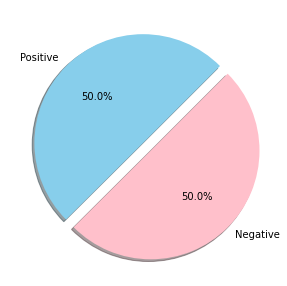

In [9]:
VisualizeDistribution(df_trn)

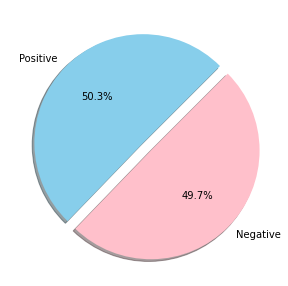

In [10]:
VisualizeDistribution(df_val)

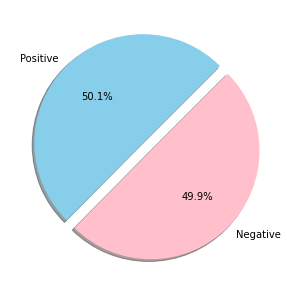

In [11]:
VisualizeDistribution(df_tst)

# Preprocessing

We will import RE, that is, the regular expression operation, we use this library to remove html tags like `<a>` or. 
    
So whenever we come across these tags, we replace them with an empty string. 
    
Then, we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /.

In [12]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>','',text)
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = re.sub('[\W]+',' ', text.lower()) + ' '.join(emojis).replace('-','')
    return text   

using nltk’s SnowballStemmer to simplify the data and remove unnecessary complexities in our text data

https://www.nltk.org/_modules/nltk/stem/snowball.html

In [13]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenizer(text):
    return text.split()

def tokenizer_snowball(text):
    return [stemmer.stem(w) for w in text.split()]

In [14]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [15]:
from wordcloud import WordCloud
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() 
                             if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stopwords_en,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Visualize Positive and Negative words

We remove stopwords, then illustrate the positive and nagative words using a wordcloud.

In [16]:
def VisualizeWords_Positive(df, color="white"):
    data = df[df["label"]==1]
    data_processed = [preprocessor(t) for t in data["text"].values.tolist()]    
    wordcloud_draw(data_processed)

def VisualizeWords_Negative(df, color="white"):
    data = df[df["label"]==0]
    data_processed = [preprocessor(t) for t in data["text"].values.tolist()]    
    wordcloud_draw(data_processed)


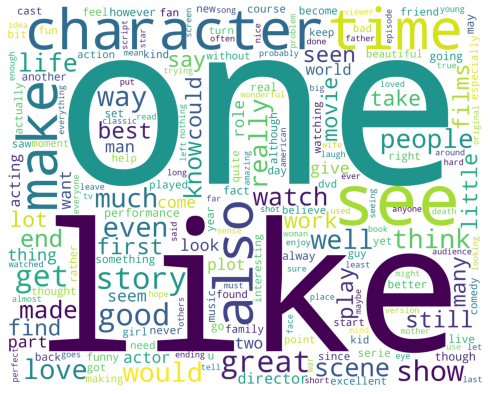

In [17]:
VisualizeWords_Positive(df_trn)

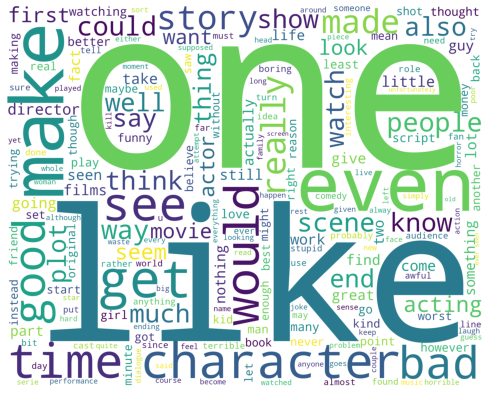

In [18]:
VisualizeWords_Negative(df_trn)

Indeed, the positive words are highlighted are love, great, good, excellent, etc.

While the negative words are described as bad, poor, terrible. 
However, in the "negative" word-cloud, we could see some 'positive' words, 
such as well, good, great --> it makes us confuse :)


Training Phase

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    strip_accents=None,
    lowercase=False,
    preprocessor=None,
    tokenizer=tokenizer_snowball,
    use_idf=True,
    norm="l2",
    smooth_idf=True
)

In [20]:
X_trn, y_trn = df_trn["text"], df_trn["label"]

In [21]:
X_trn_tfidf = tfidf.fit_transform(X_trn)

In [22]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
clf = LogisticRegressionCV(
    max_iter=3,
    scoring="accuracy",
    random_state=0,
    cv=5,
    verbose=3,
    n_jobs=-1
)

clf.fit(X_trn_tfidf, y_trn)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


     -6.2633D-02  2.0276D-01 -7.9150D-01  0.0000D+00 -1.1464D-01  3.4366D+00
      5.4844D-01 -1.3413D-01 -1.3413D-01  1.0385D-01  3.2999D-02  3.2999D-02
      0.0000D+00  0.0000D+00  6.4113D-02  3.2999D-02  3.2999D-02  1.0385D-01
      6.4062D-02  0.0000D+00  4.2698D-01  2.1122D-02 -5.8745D-01 -3.3141D-02
      0.0000D+00 -8.4968D-02 -3.3141D-02  3.4223D-01 -5.8745D-01 -5.8745D-01
     -5.8745D-01  0.0000D+00 -5.8745D-01 -6.4330D-01 -3.3141D-02 -3.3141D-02
      1.3608D-01 -5.8745D-01 -1.7623D+00 -5.8745D-01 -3.3141D-02  0.0000D+00
     -3.3141D-02 -5.8745D-01 -5.8745D-01 -8.4968D-02 -5.8745D-01 -2.5564D-02
      1.3608D-01 -5.8745D-01 -5.8745D-01 -5.8745D-01 -5.8745D-01 -5.8745D-01
      6.7992D-02 -6.2968D-03 -7.0579D-02 -1.9593D-01 -2.1754D+00  4.4577D-02
      1.4069D-01  0.0000D+00  0.0000D+00  5.9446D-01  3.3656D+00  1.0497D-02
     -9.3392D-03  0.0000D+00  8.5339D-03  8.4153D-03  1.2613D+00  1.2613D+00
      4.1713D-01  1.5005D-01  0.0000D+00 -1.0327D+00  2.7335D-02 -2.6112D-01

     -1.3266D-05 -4.8432D-06  4.2169D-06 -4.6627D-06 -1.7329D-05 -5.3090D-06
      2.5093D-06 -2.9772D-06 -1.5626D-05  5.9212D-06 -3.8768D-06  0.0000D+00
      9.4522D-06  6.0868D-06  5.0132D-06  0.0000D+00 -2.1108D-07 -1.2681D-05
      4.6122D-06  0.0000D+00  0.0000D+00  1.0429D-05  9.0770D-06  0.0000D+00
      0.0000D+00  0.0000D+00 -1.0655D-05  3.1241D-06  5.5103D-06  6.5614D-06
      5.1314D-06 -2.7892D-06  5.3981D-06 -4.7297D-06 -1.0503D-05 -2.4507D-05
     -2.0974D-05  3.7916D-06  0.0000D+00  2.0016D-06  0.0000D+00 -5.5513D-05
     -1.6799D-05 -1.0288D-05  8.8899D-06  7.6592D-06 -7.2965D-06 -1.2849D-05
     -5.4823D-06  9.0408D-06  1.5631D-06  1.0741D-05 -1.6715D-06 -3.3439D-06
     -4.6813D-06 -1.9258D-05  6.4361D-06 -3.9910D-06  0.0000D+00 -3.6643D-06
      8.1419D-06  2.5491D-06  8.5688D-06  3.9822D-06 -1.9324D-05 -8.7679D-06
     -4.7496D-06 -3.8962D-06 -3.4365D-06  7.2251D-06 -8.0420D-06  0.0000D+00
      0.0000D+00  5.0451D-06  5.5245D-06  9.2245D-06 -8.0459D-06  7.7395D-06

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
from sklearn.metrics import accuracy_score

X_tst_tfidf = tfidf.transform(df_tst["text"])
y_tst_pred = clf.predict(X_tst_tfidf)
y_tst = df_tst["label"].values.tolist()

print("Accuracy of test set: ", accuracy_score(y_tst_pred, y_tst))
# Accuracy of test set:  0.8952

Accuracy of test set:  0.8952


# Perspectives

1. Improve pre-processing
2. Pipeline e2e 
3. GridSearch with various parameters